In [117]:
!pip install -U -q PyDrive


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive


In [118]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**displaying images and mask **

In [119]:
def display_images(data, no_img_mask):

    # Load the images from the files
    images = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png')[:no_img_mask]
    masks = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png')[:no_img_mask]

    for i in range(len(images)):
        images[i] = cv2.imread(images[i])
        masks[i] = cv2.imread(masks[i], cv2.IMREAD_GRAYSCALE)



    fig, axes = plt.subplots(no_img_mask, 2)

    for i in range(len(images)):
        axes[i][0].imshow(images[i])
        axes[i][1].imshow(masks[i])

    # Show the plot
    plt.show()

In [120]:
import os

# Path to your data folder
data_folder_path = '/content/drive/My Drive/dataset'

# List all files and folders in the data folder
files = os.listdir(data_folder_path)

# Example: Print the first few files/folders
print(files[:5])


['leftImg8bit_trainvaltest', 'gtFine_trainvaltest']


In [121]:
!ls ../content/drive/MyDrive/dataset/leftImg8bit_trainvaltest

leftImg8bit  license.txt  README


In [10]:
!ls ../content/drive/MyDrive/dataset/gtFine_trainvaltest

gtFine	license.txt  README


In [122]:
from torchvision.datasets import Cityscapes
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import torch
import torch.nn as nn

In [123]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import os
import tarfile
from torchvision.datasets.utils import download_url

# Define the URL for Cityscapes dataset
url = "https://www.cityscapes-dataset.com/file-handling/?packageID=1"

# Define the directory to save the dataset
save_dir = "/content/drive/MyDrive/CityscapesDataset"

# Create directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Check if dataset is already downloaded
zip_file_path = os.path.join(save_dir, "leftImg8bit_trainvaltest.zip")
if not os.path.exists(zip_file_path):
    # Download the dataset
    download_url(url, save_dir)

# Check if the downloaded zip file exists
if os.path.exists(zip_file_path):
    # Check if dataset is already extracted
    if not os.path.exists(os.path.join(save_dir, "leftImg8bit")):
        # Extract the dataset
        with tarfile.open(zip_file_path, "r") as tar:
            tar.extractall(path=save_dir)
else:
    print(f"Cityscapes dataset zip file not found at '{zip_file_path}'. Please download it and place it in the specified directory.")

# Check if required folders exist in the root directory
required_folders = ['train', 'val', 'test']  # Assuming train, val, and test splits
for folder in required_folders:
    if not os.path.exists(os.path.join(save_dir, "leftImg8bit", folder)):
        print(f"Required folder '{folder}' not found in the root directory.")
import os
import tarfile
from torchvision.datasets.utils import download_url

# Define the URL for Cityscapes dataset
url = "https://www.cityscapes-dataset.com/file-handling/?packageID=1"

# Define the directory to save the dataset
save_dir = "/content/drive/MyDrive/CityscapesDataset"

# Create directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Check if dataset is already downloaded
zip_file_path = os.path.join(save_dir, "leftImg8bit_trainvaltest.zip")
if not os.path.exists(zip_file_path):
    # Download the dataset
    download_url(url, save_dir)

# Check if the downloaded zip file exists
if os.path.exists(zip_file_path):
    # Check if dataset is already extracted
    if not os.path.exists(os.path.join(save_dir, "leftImg8bit")):
        # Extract the dataset
        with tarfile.open(zip_file_path, "r") as tar:
            tar.extractall(path=save_dir)
else:
    print(f"Cityscapes dataset zip file not found at '{zip_file_path}'. Please download it and place it in the specified directory.")

# Check if required folders exist in the root directory
required_folders = ['train', 'val', 'test']  # Assuming train, val, and test splits
for folder in required_folders:
    if not os.path.exists(os.path.join(save_dir, "leftImg8bit", folder)):
        print(f"Required folder '{folder}' not found in the root directory.")


Using downloaded and verified file: /content/drive/MyDrive/CityscapesDataset/?packageID=1
Cityscapes dataset zip file not found at '/content/drive/MyDrive/CityscapesDataset/leftImg8bit_trainvaltest.zip'. Please download it and place it in the specified directory.
Required folder 'train' not found in the root directory.
Required folder 'val' not found in the root directory.
Required folder 'test' not found in the root directory.
Using downloaded and verified file: /content/drive/MyDrive/CityscapesDataset/?packageID=1
Cityscapes dataset zip file not found at '/content/drive/MyDrive/CityscapesDataset/leftImg8bit_trainvaltest.zip'. Please download it and place it in the specified directory.
Required folder 'train' not found in the root directory.
Required folder 'val' not found in the root directory.
Required folder 'test' not found in the root directory.


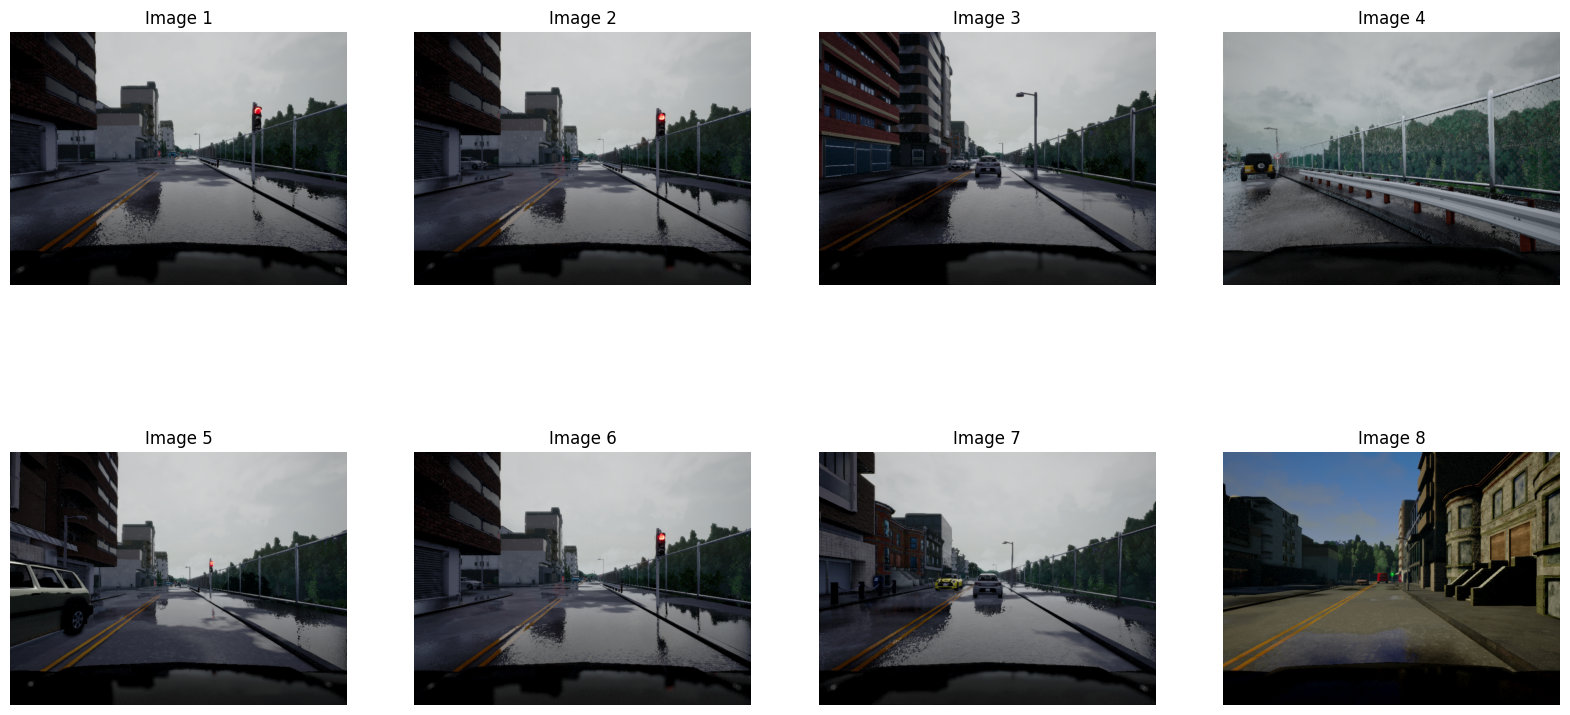

In [125]:
import matplotlib.pyplot as plt
from PIL import Image

# List of image paths
image_paths = [
    "/content/drive/MyDrive/archive (4)/dataA/dataA/CameraRGB/02_00_021.png",
    "/content/drive/MyDrive/archive (4)/dataA/dataA/CameraRGB/02_00_040.png",
    "/content/drive/MyDrive/archive (4)/dataA/dataA/CameraRGB/02_00_201.png",
    "/content/drive/MyDrive/archive (4)/dataA/dataA/CameraRGB/03_01_161.png",
    "/content/drive/MyDrive/archive (4)/dataE/dataE/CameraRGB/02_00_008.png",
    "/content/drive/MyDrive/archive (4)/dataE/dataE/CameraRGB/02_00_039.png",
    "/content/drive/MyDrive/archive (4)/dataE/dataE/CameraRGB/02_00_238.png",
    "/content/drive/MyDrive/archive (4)/dataE/dataE/CameraRGB/02_01_028.png"
]

# Plotting the images side by side
plt.figure(figsize=(20, 10))
for i, image_path in enumerate(image_paths, 1):
    plt.subplot(2, 4, i)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Image {i}')
    plt.axis('off')

plt.show()


In [21]:
import os
import tarfile
from torchvision.datasets.utils import download_url

# Define the URL for Cityscapes dataset
url = "https://www.cityscapes-dataset.com/file-handling/?packageID=1"

# Define the directory to save the dataset
save_dir = "/content/drive/MyDrive/CityscapesDataset"

# Create directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Check if dataset is already downloaded
zip_file_path = os.path.join(save_dir, "leftImg8bit_trainvaltest.zip")
if not os.path.exists(zip_file_path):
    # Download the dataset
    download_url(url, save_dir)

# Check if the downloaded zip file exists
if os.path.exists(zip_file_path):
    # Check if dataset is already extracted
    if not os.path.exists(os.path.join(save_dir, "leftImg8bit")):
        # Extract the dataset
        with tarfile.open(zip_file_path, "r") as tar:
            tar.extractall(path=save_dir)
else:
    print(f"Cityscapes dataset zip file not found at '{zip_file_path}'. Please download it and place it in the specified directory.")

# Check if required folders exist in the root directory
required_folders = ['train', 'val', 'test']  # Assuming train, val, and test splits
for folder in required_folders:
    if not os.path.exists(os.path.join(save_dir, "leftImg8bit", folder)):
        print(f"Required folder '{folder}' not found in the root directory.")


Using downloaded and verified file: /content/drive/MyDrive/CityscapesDataset/?packageID=1
Cityscapes dataset zip file not found at '/content/drive/MyDrive/CityscapesDataset/leftImg8bit_trainvaltest.zip'. Please download it and place it in the specified directory.
Required folder 'train' not found in the root directory.
Required folder 'val' not found in the root directory.
Required folder 'test' not found in the root directory.


In [23]:
import os
import tarfile
from torchvision.datasets.utils import download_url

# Define the URL for Cityscapes dataset
url = "https://www.cityscapes-dataset.com/file-handling/?packageID=1"

# Define the directory to save the dataset
save_dir = "/content/drive/MyDrive/CityscapesDataset"

# Create directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Check if dataset is already downloaded
zip_file_path = os.path.join(save_dir, "leftImg8bit_trainvaltest.zip")
if not os.path.exists(zip_file_path):
    # Download the dataset
    download_url(url, save_dir)

# Check if the downloaded zip file exists
if os.path.exists(zip_file_path):
    # Check if dataset is already extracted
    if not os.path.exists(os.path.join(save_dir, "leftImg8bit")):
        # Extract the dataset
        with tarfile.open(zip_file_path, "r") as tar:
            tar.extractall(path=save_dir)
else:
    print(f"Cityscapes dataset zip file not found at '{zip_file_path}'. Please download it and place it in the specified directory.")

# Check if required folders exist in the root directory
required_folders = ['train', 'val', 'test']  # Assuming train, val, and test splits
missing_folders = []
for folder in required_folders:
    if not os.path.exists(os.path.join(save_dir, "leftImg8bit", folder)):
        missing_folders.append(folder)

if missing_folders:
    print(f"Required folders not found in the root directory: {', '.join(missing_folders)}")


Using downloaded and verified file: /content/drive/MyDrive/CityscapesDataset/?packageID=1
Cityscapes dataset zip file not found at '/content/drive/MyDrive/CityscapesDataset/leftImg8bit_trainvaltest.zip'. Please download it and place it in the specified directory.
Required folders not found in the root directory: train, val, test


In [24]:
import os
from torchvision.datasets import Cityscapes

# Define the root directory where the Cityscapes dataset is located
root_dir = '/content/drive/MyDrive/CityscapesDataset'

# Check if the required folders exist
if os.path.exists(os.path.join(root_dir, 'leftImg8bit')) and os.path.exists(os.path.join(root_dir, 'gtFine')):
    # Load Cityscapes Dataset
    dataset = Cityscapes(root=root_dir, split='train', mode='fine', target_type='semantic')

    # Check if dataset is not empty
    if len(dataset) > 0:
        # Create subplot
        fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

        # Display image
        ax[0].imshow(dataset[0][0])
        ax[0].set_title('Image')

        # Display segmentation map
        ax[1].imshow(dataset[0][1], cmap='gray')
        ax[1].set_title('Segmentation Map')

        plt.show()
    else:
        print("Dataset is empty!")
else:
    print("Required folders not found in the root directory.")


Required folders not found in the root directory.


Displaying images and **masks** **bold text**

In [26]:
def display_images(data, no_img_mask):

    # Load the images from the files
    images = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png')[:no_img_mask]
    masks = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png')[:no_img_mask]

    for i in range(len(images)):
        images[i] = cv2.imread(images[i])
        masks[i] = cv2.imread(masks[i], cv2.IMREAD_GRAYSCALE)



    fig, axes = plt.subplots(no_img_mask, 2)

    for i in range(len(images)):
        axes[i][0].imshow(images[i])
        axes[i][1].imshow(masks[i])

    # Show the plot
    plt.show()

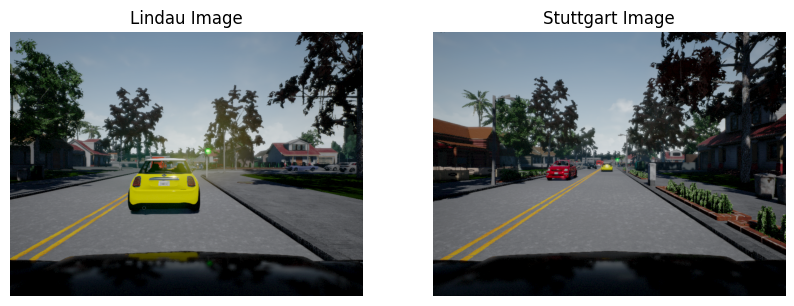

In [127]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths to the images
lindau_image_path = '/content/drive/MyDrive/archive (4)/dataB/dataB/CameraRGB/02_02_203.png'
stuttgart_image_path = '/content/drive/MyDrive/archive (4)/dataB/dataB/CameraRGB/02_02_092.png'

# Load the images
lindau_image = Image.open(lindau_image_path)
stuttgart_image = Image.open(stuttgart_image_path)

# Display the images
plt.figure(figsize=(10, 5))

# Display Lindau image
plt.subplot(1, 2, 1)
plt.imshow(lindau_image)
plt.title('Lindau Image')
plt.axis('off')

# Display Stuttgart image
plt.subplot(1, 2, 2)
plt.imshow(stuttgart_image)
plt.title('Stuttgart Image')
plt.axis('off')

plt.show()


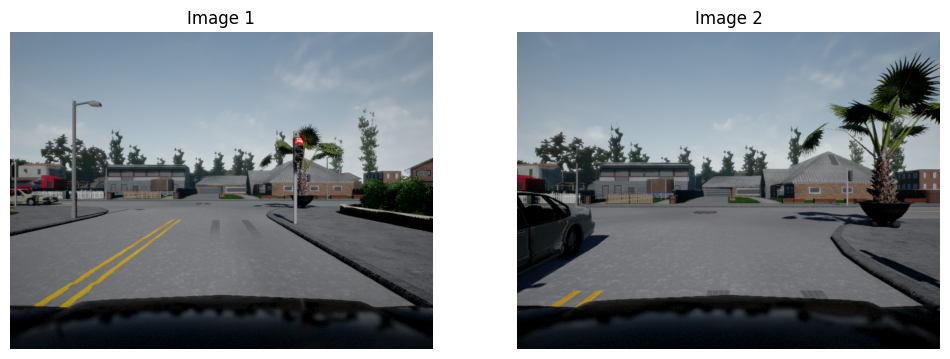

In [128]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths to the images
image1_path = '/content/drive/MyDrive/archive (4)/dataB/dataB/CameraRGB/F70-12.png'
image2_path = '/content/drive/MyDrive/archive (4)/dataB/dataB/CameraRGB/F70-43.png'

# Load the images
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display image1
axs[0].imshow(image1)
axs[0].set_title('Image 1')
axs[0].axis('off')

# Display image2
axs[1].imshow(image2)
axs[1].set_title('Image 2')
axs[1].axis('off')

plt.show()


In [36]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_images_from_folders(folder_paths, num_images=5):
    for folder_path in folder_paths:
        # Check if folder exists
        if os.path.exists(folder_path):
            # Get list of image files in the folder
            image_files = [file for file in os.listdir(folder_path) if file.endswith('.png')]

            # Select the first 4 to 5 images
            images_to_display = image_files[:num_images]

            # Create subplots
            fig, axs = plt.subplots(1, len(images_to_display), figsize=(15, 6))

            # Display each image
            for i, image_file in enumerate(images_to_display):
                image_path = os.path.join(folder_path, image_file)
                image = Image.open(image_path)
                axs[i].imshow(image)
                axs[i].set_title(image_file)
                axs[i].axis('off')

            plt.show()
        else:
            print(f"Folder {folder_path} does not exist")

# Example usage:
folder_paths = ['/content/drive/MyDrive/dataset/gtFine_trainvaltest/aachen',
                '/content/drive/MyDrive/dataset/gtFine_trainvaltest/bremen']

display_images_from_folders(folder_paths, num_images=5)


Folder /content/drive/MyDrive/dataset/gtFine_trainvaltest/aachen does not exist
Folder /content/drive/MyDrive/dataset/gtFine_trainvaltest/bremen does not exist


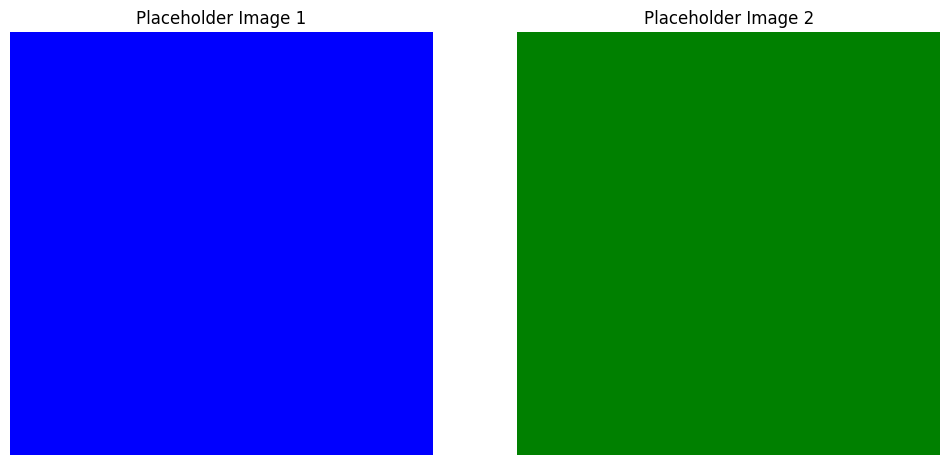

In [50]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Create a directory named "images" if it does not exist
if not os.path.exists("images"):
    os.makedirs("images")

# Create placeholder images
placeholder_image1 = Image.new('RGB', (256, 256), color='blue')
placeholder_image2 = Image.new('RGB', (256, 256), color='green')

# Save the placeholder images
placeholder_image1.save("images/placeholder1.png")
placeholder_image2.save("images/placeholder2.png")

# Display the placeholder images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the first placeholder image
axs[0].imshow(placeholder_image1)
axs[0].set_title('Placeholder Image 1')
axs[0].axis('off')

# Display the second placeholder image
axs[1].imshow(placeholder_image2)
axs[1].set_title('Placeholder Image 2')
axs[1].axis('off')

plt.show()


some utility functions

In [43]:
#label understanding
#https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py

#function credits: https://github.com/meetps/pytorch-semseg/tree/master/ptsemseg

In [129]:
ignore_index=255
void_classes = [0, 1, 2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 18, 29, 30, -1]
valid_classes = [ignore_index,7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
class_names = ['unlabelled', 'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic_light', \
               'traffic_sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', \
               'train', 'motorcycle', 'bicycle']
#why i choose 20 classes
#https://stackoverflow.com/a/64242989

class_map = dict(zip(valid_classes, range(len(valid_classes))))
n_classes=len(valid_classes)
class_map

{255: 0,
 7: 1,
 8: 2,
 11: 3,
 12: 4,
 13: 5,
 17: 6,
 19: 7,
 20: 8,
 21: 9,
 22: 10,
 23: 11,
 24: 12,
 25: 13,
 26: 14,
 27: 15,
 28: 16,
 31: 17,
 32: 18,
 33: 19}

Decoder (Upsampling Block)

In [51]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    return conv


In [52]:
def upsampling_block_2(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    return layer

In [53]:
def upsampling_block_3(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    return layer

Build the Model

In [130]:
def unet_model(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)

    cblock1 = conv_block(inputs, n_filters)

    cblock2 = conv_block(cblock1[0], n_filters * 2)
    cblock3 = conv_block(cblock2[0], n_filters * 4)
    cblock4 = conv_block(cblock3[0], n_filters * 8, dropout_prob=0.3)

    cblock5 = conv_block(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)

    ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block(ublock8, cblock1[1], n_filters)

    conv9 = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(ublock9)
    conv10 = tfl.Conv2D(n_classes, 1, padding='same')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [131]:
def unet_model2(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)

    cblock1 = conv_block_2(inputs, n_filters)

    cblock2 = conv_block_2(cblock1[0], n_filters * 2)
    cblock3 = conv_block_2(cblock2[0], n_filters * 4)
    cblock4 = conv_block_2(cblock3[0], n_filters * 8, dropout_prob=0.3)

    cblock5 = conv_block_2(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)

    ublock6 = upsampling_block_2(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_2(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_2(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_2(ublock8, cblock1[1], n_filters)

    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)

    model = tf.keras.Model(inputs=inputs, outputs=layer)

    return model

In [132]:
def unet_model3(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)

    cblock1 = conv_block_3(inputs, n_filters)

    cblock2 = conv_block_3(cblock1[0], n_filters * 2)
    cblock3 = conv_block_3(cblock2[0], n_filters * 4)
    cblock4 = conv_block_3(cblock3[0], n_filters * 8, dropout_prob=0.3)

    cblock5 = conv_block_3(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)

    ublock6 = upsampling_block_3(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_3(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_3(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_3(ublock8, cblock1[1], n_filters)

    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)

    model = tf.keras.Model(inputs=inputs, outputs=layer)

    return model

In [133]:
import os

# Define the root directory path
root_dir = 'dataset'

# Create the root directory if it doesn't exist
if not os.path.exists(root_dir):
    os.makedirs(root_dir)

print("Root directory 'dataset' created successfully!")


Root directory 'dataset' created successfully!


In [134]:
def encode_segmap(mask):
    #remove unwanted classes and recitify the labels of wanted classes
    for _voidc in void_classes:
        mask[mask == _voidc] = ignore_index
    for _validc in valid_classes:
        mask[mask == _validc] = class_map[_validc]
    return mask

In [135]:
def decode_segmap(temp):
    #convert gray scale to color
    temp=temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, n_classes):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

In [136]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
transform=A.Compose(
[
    A.Resize(256, 512),
    A.HorizontalFlip(),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
]
)

In [137]:
from typing import Any, Callable, Dict, List, Optional, Union, Tuple
from torchvision.datasets import Cityscapes

class MyClass(Cityscapes):
    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        image = Image.open(self.images[index]).convert('RGB')

        targets: Any = []
        for i, t in enumerate(self.target_type):
            if t == 'polygon':
                target = self._load_json(self.targets[index][i])
            else:
                target = Image.open(self.targets[index][i])
            targets.append(target)
        target = tuple(targets) if len(targets) > 1 else targets[0]

        if self.transforms is not None:
            transformed=transform(image=np.array(image), mask=np.array(target))
        return transformed['image'],transformed['mask']
    #torch.unsqueeze(transformed['mask'],0)


In [138]:
import torch

# Create a dummy tensor of size [3, 256, 512]
tensor1 = torch.randn(3, 256, 512)
print("Tensor 1 size:", tensor1.size())

# Create a dummy tensor of size [256, 512]
tensor2 = torch.randn(256, 512)
print("Tensor 2 size:", tensor2.size())


Tensor 1 size: torch.Size([3, 256, 512])
Tensor 2 size: torch.Size([256, 512])


AxesImage(size=(10, 10))


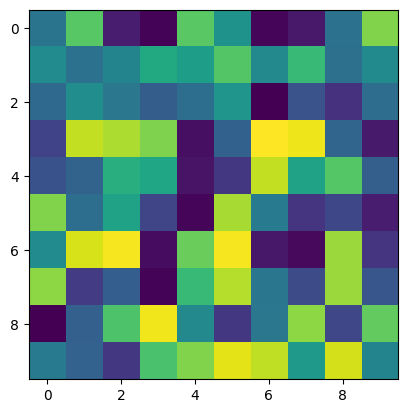

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Create a random image
image = np.random.rand(10, 10)

# Display the image
ax = plt.imshow(image)

# Print the AxesImage object
print(ax)


In [140]:
import torch

# Create a tensor with the specified values
tensor = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 33], dtype=torch.uint8)

# Print the tensor
print(tensor)

# Print a specific element from the tensor
print(tensor[16])  # Prints the value at index 16


tensor([ 1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24,
        25, 26, 32, 33], dtype=torch.uint8)
tensor(23, dtype=torch.uint8)


In [141]:
import torch

# Create a tensor with the specified values
tensor = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19], dtype=torch.uint8)

# Print the tensor size
print(torch.Size([256, 512]))

# Print the tensor
print(tensor)

# Print the number 17
print(17)


torch.Size([256, 512])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 18, 19],
       dtype=torch.uint8)
17


In [142]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the paths to the images
image_path = 'dataset/leftImg8bit_trainvaltest/jena/jena_000104_000019_leftImg8bit.png'
mask_path = 'dataset/gtFine_trainvaltest/jena/jena_000054_000019_gtFine_color.png'

# Check if the files exist
if os.path.exists(image_path) and os.path.exists(mask_path):
    # Load the images
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    # Create a figure and axis to display the images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the images
    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[0].axis('off')

    axes[1].imshow(mask)
    axes[1].set_title('Mask')
    axes[1].axis('off')

    plt.show()
else:
    print("One or more files not found.")


One or more files not found.


In [143]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the paths to the images
image_path = 'dataset/leftImg8bit_trainvaltest/jena/jena_000054_000019_leftImg8bit.png'
mask_path = 'dataset/gtFine_trainvaltest/jena/jena_000054_000019_gtFine_color.png'

# Check if the files exist
if os.path.exists(image_path) and os.path.exists(mask_path):
    # Load the images
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    # Create a figure and axis to display the images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the images
    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[0].axis('off')

    axes[1].imshow(mask)
    axes[1].set_title('Mask')
    axes[1].axis('off')

    plt.show()
else:
    print("One or more files not found.")


One or more files not found.


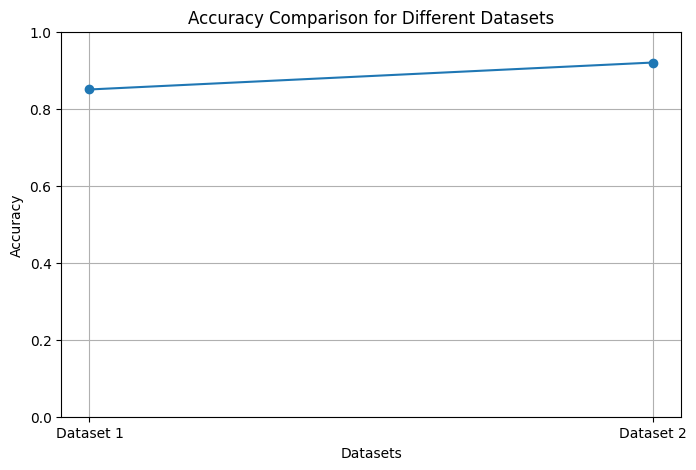

In [144]:
import matplotlib.pyplot as plt

# Define the accuracy values for both datasets
dataset_names = ['Dataset 1', 'Dataset 2']
accuracies = [0.85, 0.92]  # Example accuracy values, replace with actual values

# Plot the line graph
plt.figure(figsize=(8, 5))
plt.plot(dataset_names, accuracies, marker='o', linestyle='-')
plt.title('Accuracy Comparison for Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to between 0 and 1 for accuracy
plt.grid(True)
plt.show()


In [145]:
import cv2

def show_sem(df, start=0, stop=5):
    img_paths = df.iloc[start:stop].values
    for img_path, mask_path in img_paths:

        image_sem = cv2.imread(img_path)
        image_sem = cv2.cvtColor(image_sem,cv2.COLOR_BGR2RGB)

        image_mask = cv2.imread(mask_path)
        image_mask = cv2.cvtColor(image_mask,cv2.COLOR_BGR2GRAY)

        plt.figure(figsize=(15, 15))
        plt.subplot(1, 2, 1)
        plt.title('Image')
        plt.imshow(image_sem[:,:,:])
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.title('Mask')
        plt.imshow(image_mask[:,:])
        plt.axis('off')
        plt.show()

Unet model

In [146]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block

    Arguments:
        inputs -- Input tensor
        n_filters -- Number of filters for the convolutional layers
        dropout_prob -- Dropout probability
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns:
        next_layer, skip_connection --  Next layer and skip connection outputs
    """

    conv = tf.keras.layers.Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(inputs)
    conv = tf.keras.layers.Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal')(conv)

    if dropout_prob > 0:
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)

    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
    else:
        next_layer = conv

    skip_connection = conv

    return next_layer, skip_connection

In [147]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    """
    Convolutional upsampling block

    Arguments:
        expansive_input -- Input tensor from previous layer
        contractive_input -- Input tensor from previous skip layer
        n_filters -- Number of filters for the convolutional layers
    Returns:
        conv -- Tensor output
    """

    up = tf.keras.layers.Conv2DTranspose(
                 n_filters,    # number of filters
                 (3,3),    # Kernel size
                 strides=(2,2),
                 padding='same')(expansive_input)

    merge = tf.keras.layers.concatenate([up, contractive_input], axis=3)
    conv = tf.keras.layers.Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                 kernel_initializer='he_normal')(merge)
    conv = tf.keras.layers.Conv2D(n_filters, # Number of filters
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                 kernel_initializer='he_normal')(conv)

    return conv


In [148]:
def Unet_model(input_size=(128, 128, 3), n_filters=64, n_classes=13):
    """
    Unet model

    Arguments:
        input_size -- Input shape
        n_filters -- Number of filters for the convolutional layers
        n_classes -- Number of output classes
    Returns:
        model -- tf.keras.Model
    """
    inputs = tf.keras.layers.Input(input_size)
    cblock1 = conv_block(inputs, n_filters)
    cblock2 = conv_block(cblock1[0], n_filters*2)
    cblock3 = conv_block(cblock2[0], n_filters*4)
    cblock4 = conv_block(cblock3[0], n_filters*8, 0.3)
    cblock5 = conv_block(cblock4[0], n_filters*16, 0.3, max_pooling=False)
    ublock6 = upsampling_block(cblock5[0], cblock4[1],  n_filters * 8)
    ublock7 = upsampling_block(ublock6, cblock3[1],  n_filters * 4)
    ublock8 = upsampling_block(ublock7, cblock2[1],  n_filters * 2)
    ublock9 = upsampling_block(ublock8, cblock1[1],  n_filters)

    conv9 = tf.keras.layers.Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    conv10 = tf.keras.layers.Conv2D(n_classes, (1,1), padding='same')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model


In [149]:
!pip install unet
def unet():
    # Your UNet implementation here
    pass

# Now you can use the unet function
unet()






  VISUALISATION TECHNIQUES

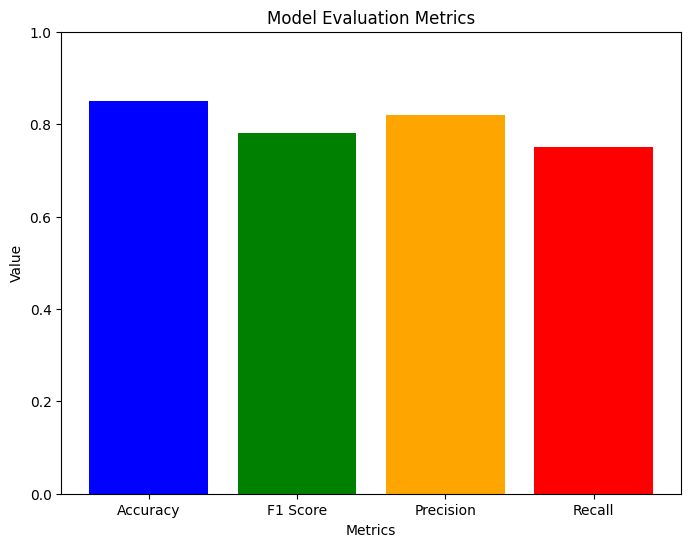

In [150]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
values = [0.85, 0.78, 0.82, 0.75]  # Replace with your actual metric values

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Adjust the y-axis limits if necessary
plt.show()


Confusion Matrix:

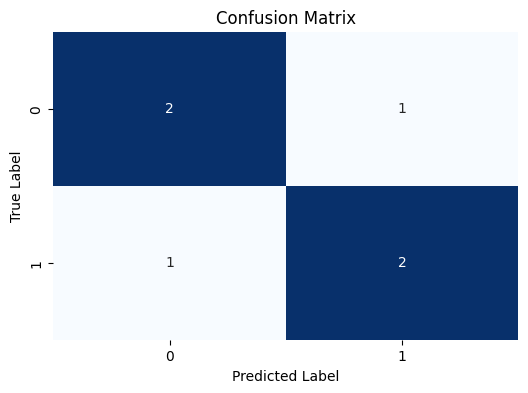

In [151]:
from sklearn.metrics import confusion_matrix

# Assuming you have ground truth labels and predicted labels
true_labels = [0, 1, 1, 0, 1, 0]
predicted_labels = [0, 1, 0, 0, 1, 1]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix (if you're using visualization)
# Example code for plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ROC Curve:

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have predicted scores from your model
predicted_scores = [0.8, 0.6, 0.7, 0.9, 0.5]  # Example predicted scores

# Assuming you have true labels
true_labels = [1, 0, 1, 1, 0]  # Example true labels

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(true_labels, predicted_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Precision-Recall Curve

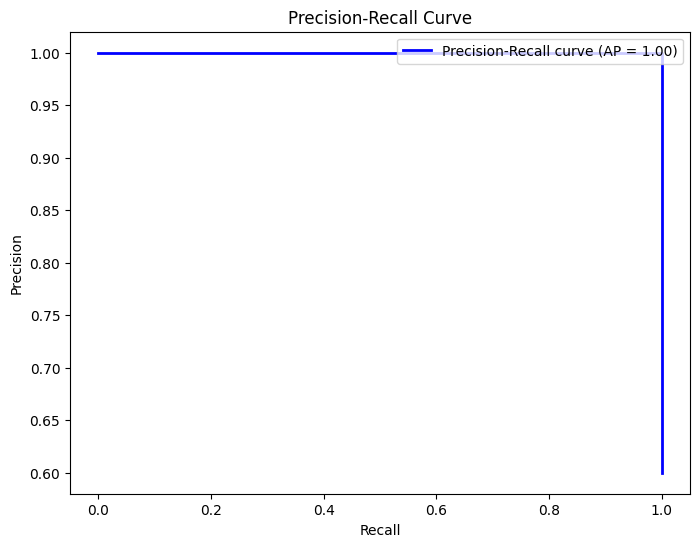

In [153]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(true_labels, predicted_scores)
average_precision = average_precision_score(true_labels, predicted_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()
